3.264
3.141592653589793


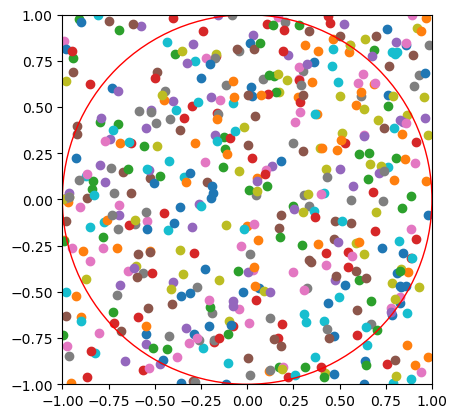

In [1]:
#Calculate Pi using a circle in a square region
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import random

#Number of points
n=500

#Defining sizes of the circle and square regions
circle_r = 1
square_side = 2*circle_r


fig, ax = plt.subplots()
ncircle=0  
for i in range(n):
    x = random.uniform(-1*circle_r,circle_r) #Draw random x values within a range
    y = random.uniform(-1*circle_r,circle_r) #Draw random y values within a range
    ax.scatter(x,y) #Plot each point individually
    r = x**2 + y**2 #Calculate distance from center of circle
    if r <= circle_r: #If radius of point is less than the circle radius, update count
        ncircle+=1
pi = square_side**2*(ncircle/n)/circle_r #Defines pi
print(pi)
print(np.pi)

#Plots Circle and square regions
ax.set_aspect('equal', adjustable='box')
plt.xlim(-1*circle_r, circle_r)
plt.ylim(-1*circle_r, circle_r)
circle = plt.Circle((0, 0), circle_r, color='r', fill=False)
ax.add_patch(circle)

In [2]:
#New subroutine
def pi_estimate(n, circle_r):
    square_side = 2*circle_r
    ncircle=0  
    for i in range(n):
        x = random.uniform(-1*circle_r,circle_r)
        y = random.uniform(-1*circle_r,circle_r)
        r = x**2 + y**2
        if r <= circle_r:
            ncircle+=1
    pi = square_side**2*(ncircle/n)/circle_r
    return pi    

List of Calculated Pi values: [3.13472 3.14948 3.13792 3.14332 3.13824 3.14836 3.1488  3.1346  3.14216
 3.14468]
np.pi: 3.141592653589793


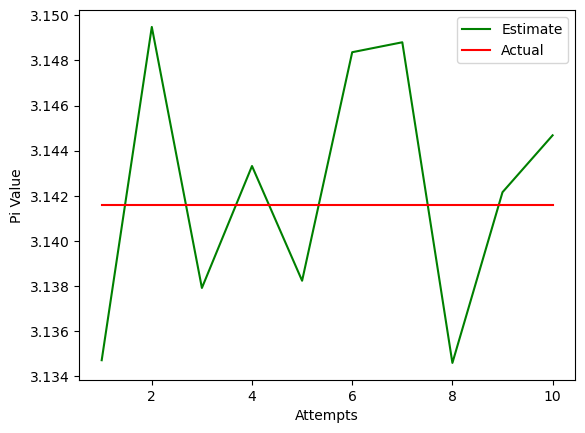

In [3]:
#Estimate of pi using subroutine
pivalues = np.zeros(10)
exactpi = np.zeros(10)
steps = 10
attempts = [1,2,3,4,5,6,7,8,9,10]

#Calculates pi for a specific number of times
for i in range(steps):
    pivalues[i]=pi_estimate(100000,1)
    exactpi[i]=np.pi

plt.xlabel('Attempts')
plt.ylabel('Pi Value')
plt.plot(attempts,pivalues,color='g',label='Estimate')
plt.plot(attempts,exactpi,color='r',label='Actual')
plt.legend()

print('List of Calculated Pi values:',pivalues)
print('np.pi:',np.pi)

In [ ]:
#Explanation
#The values of pi calculated vary a lot between randomizations, but with larger values of n the value tends to get closer to the actual value.
#This would be expected since more data points means a better approximation of the areas of the circle and square.
#There are better ways of calculating pi that would give more accurate answers without needing to simulate a large number of data points.

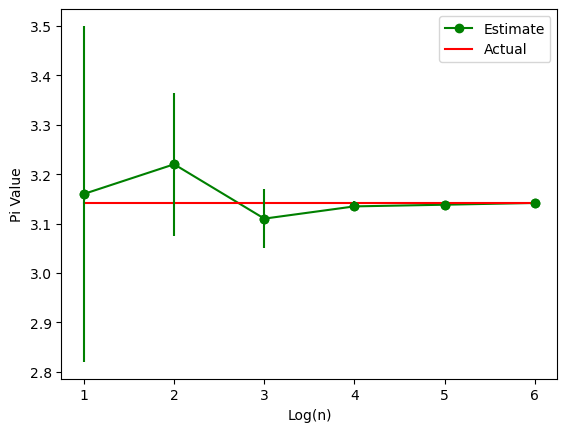

In [36]:
#Convergence Check
import statistics as stats

circle_r = 1
nvalues = [10,100,1000,10000,100000,1000000]
pivalues = np.zeros(6)
exactpi = np.zeros(6)

piavgvalues = np.zeros(6)

#Finds the standard deviation for a sample of a given number of pi estimates at a specific n value
def pi_err(nvalues, circle_r, steps):
    pisample1 = np.zeros(steps)
    for j in range(steps):
        pisample1[j] = pi_estimate(nvalues,circle_r)
    return stats.stdev(pisample1)  

#Finds the average value of pi from a sample of a given number of pi estimates at a specific n value
def pi_avg(nvalues, circle_r, steps):
    pisample2 = np.zeros(steps)
    for j in range(steps):
        pisample2[j] = pi_estimate(nvalues,circle_r)
    return np.mean(pisample2)

#Calculates estimates of pi for each n value and finds the standard deviation of a sample of estimates
y_err = np.zeros(6)
for i in range(len(nvalues)):
    y_err[i] = pi_err(nvalues[i], circle_r, 10)
    #pivalues[i] = pi_estimate(nvalues[i],circle_r)
    piavgvalues[i] = pi_avg(nvalues[i], circle_r, 10)
    exactpi[i] = np.pi

#Plots Pi estimate values versus the log of the n value
plt.xlabel('Log(n)')
plt.ylabel('Pi Value')
plt.plot(np.log10(nvalues), piavgvalues, color = 'g', label = 'Estimate', marker = 'o')
plt.plot(np.log10(nvalues), exactpi, color = 'r', label = 'Actual')
plt.errorbar(np.log10(nvalues), piavgvalues, yerr=y_err, color = 'g', fmt="o")
plt.legend()